In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import  filters
from scipy.ndimage import  laplace
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from skimage import  morphology as mo

import cv2 as cv

import pandas as pd

In [32]:
image_path = 'data/original/2.pgm'
groundtruth_path = 'data/groundtruth/2_gt.pgm'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
groundtruth = plt.imread(groundtruth_path)

## Pre Procesamiento

### Imagen Original

(-0.5, 299.5, 299.5, -0.5)

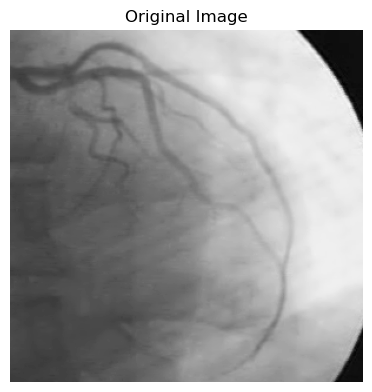

In [33]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

### Pre-Procesamiento de la Imagen

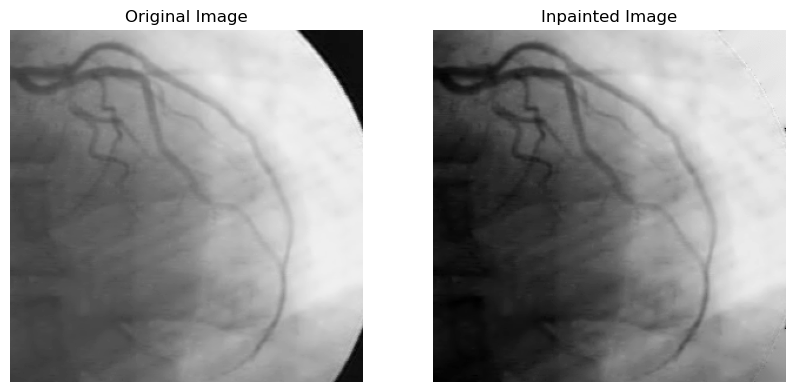

In [34]:
I = image
I = inpaint_image(I)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='gray')
plt.title('Inpainted Image')
plt.axis('off')

plt.show()

### Función de Inpainting

In [35]:
def inpaint_image(image):
    mask = (image < 25).astype(np.uint8)
    countours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    inpainting_mask = np.zeros_like(image)
    cv.drawContours(inpainting_mask, countours, -1, 255, -1)
    edges = cv.Canny(inpainting_mask, 100, 200)
    dilated_edges = cv.dilate(edges, None, iterations=2)
    combined_mask = cv.bitwise_or(inpainting_mask, dilated_edges)
    image_inpainted = cv.inpaint(image, combined_mask, inpaintRadius=5, flags=cv.INPAINT_TELEA)
    return image_inpainted

In [36]:
def adaptive_mean_threshold(image, block_size=35, C=10):
    return cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C)

## Binarización

In [37]:
def otsu_threshold(image):
    counts, bins = np.histogram(image, bins=range(257))

    bins = bins[:-1]

    acum = (counts * bins)[::-1]

    w1 = np.cumsum(counts)
    w2 = np.cumsum(counts[::-1])[::-1]
    m1 = np.cumsum(counts * bins) / w1
    m2 = (np.cumsum(acum) / w2[::-1])[::-1]

    var = w1[:-1] * w2[1:] * (m1[:-1] - m2[1:]) ** 2
    indice = np.argmax(var)
    threshold = bins[indice]

    return threshold


In [38]:
def binarize_arteries(image):
    I = (image * 255).astype(np.uint8)
    
    I = cv.medianBlur(I, 5)

    I = filters.gaussian(I, sigma=2)

    I = laplace(I)

    I = cv.normalize(I, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

    tresholds = otsu_threshold(I)
    I = I  < tresholds

    SP = mo.disk(1)
    I = mo.closing(I, SP)
    
    return I

In [39]:
def postprocess_image(binary_image):
    binary_image = binary_image.astype(np.uint8)
    
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary_image, connectivity=8)

    output_image = np.zeros_like(binary_image)
    
    for i in range(1, num_labels):
        area = stats[i, cv.CC_STAT_AREA]
        if area > 80: 
            output_image[labels == i] = 255
    
    return output_image


## Resultados

Image 1:
Accuracy: 0.9677
Recall: 0.8516
Precision: 0.5784
F1 Score: 0.6889
Specificity: 0.9728
-------------------------


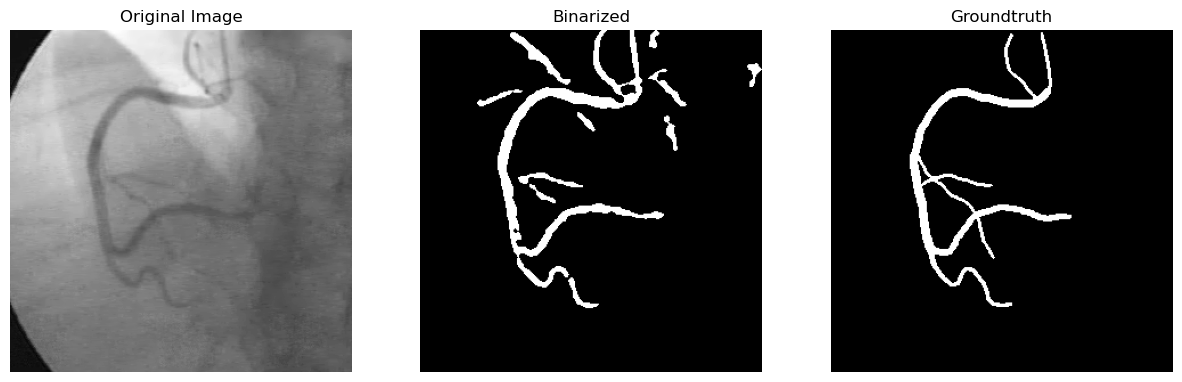

Image 2:
Accuracy: 0.9756
Recall: 0.8190
Precision: 0.7091
F1 Score: 0.7601
Specificity: 0.9834
-------------------------


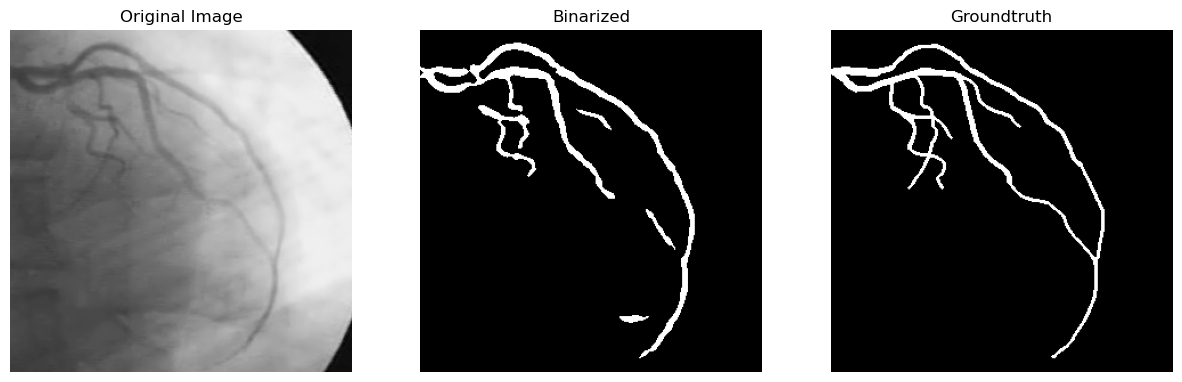

Image 3:
Accuracy: 0.9740
Recall: 0.8569
Precision: 0.6414
F1 Score: 0.7337
Specificity: 0.9791
-------------------------


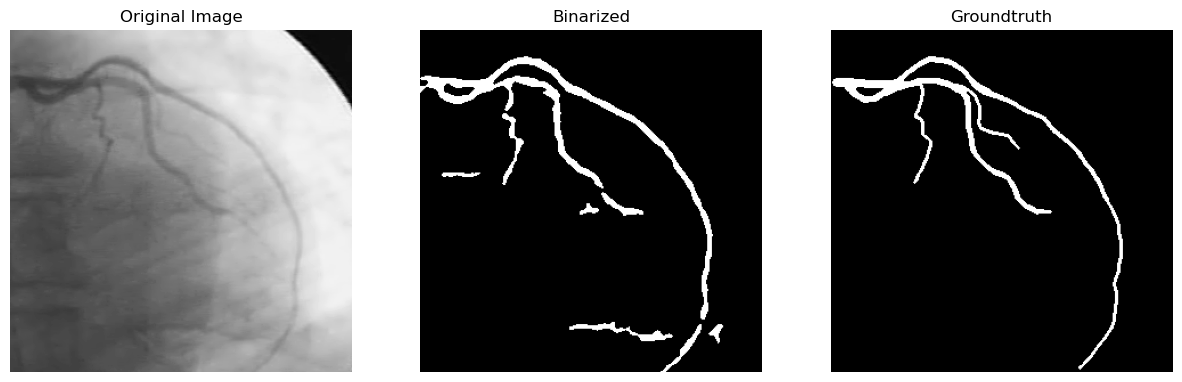

Image 4:
Accuracy: 0.2813
Recall: 0.9756
Precision: 0.0567
F1 Score: 0.1071
Specificity: 0.2492
-------------------------


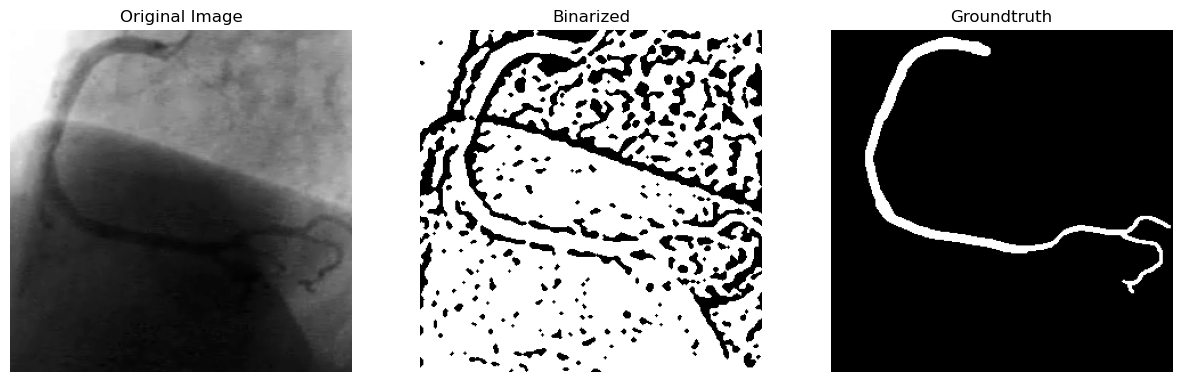

Image 5:
Accuracy: 0.9657
Recall: 0.7226
Precision: 0.5190
F1 Score: 0.6041
Specificity: 0.9749
-------------------------


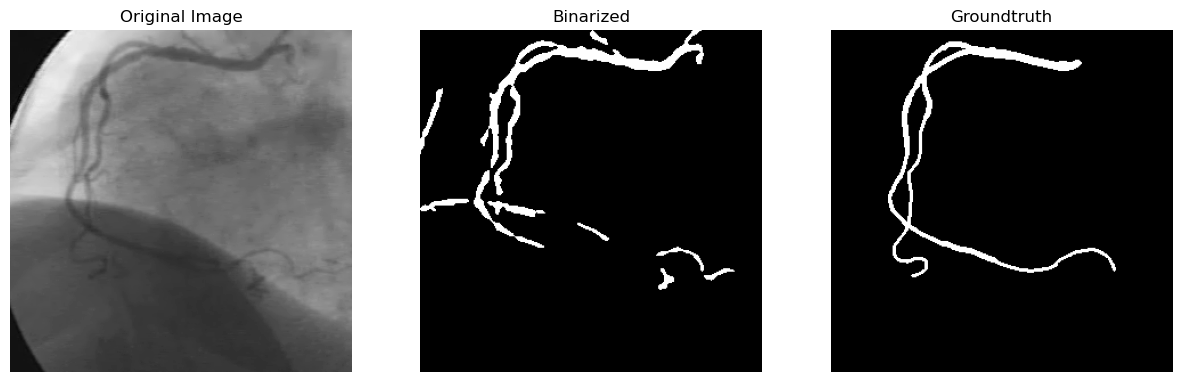

Image 6:
Accuracy: 0.9702
Recall: 0.7794
Precision: 0.5662
F1 Score: 0.6559
Specificity: 0.9774
-------------------------


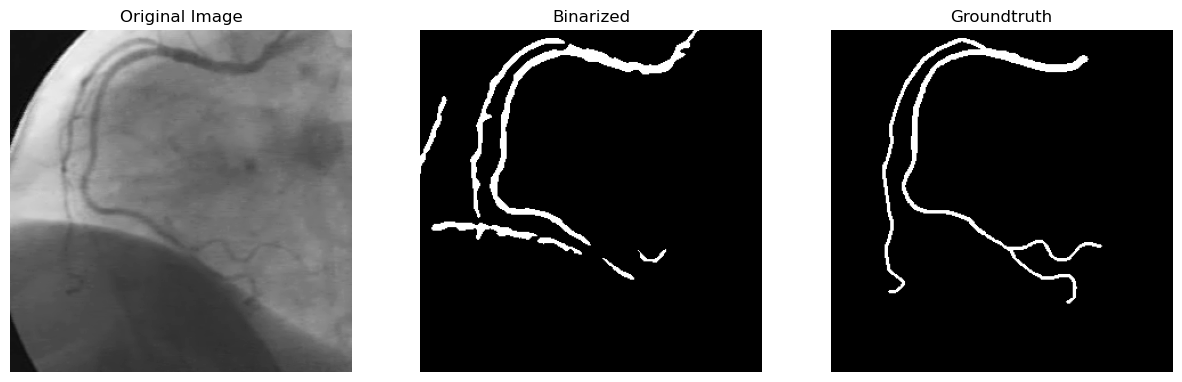

Image 7:
Accuracy: 0.8721
Recall: 0.9436
Precision: 0.2708
F1 Score: 0.4208
Specificity: 0.8684
-------------------------


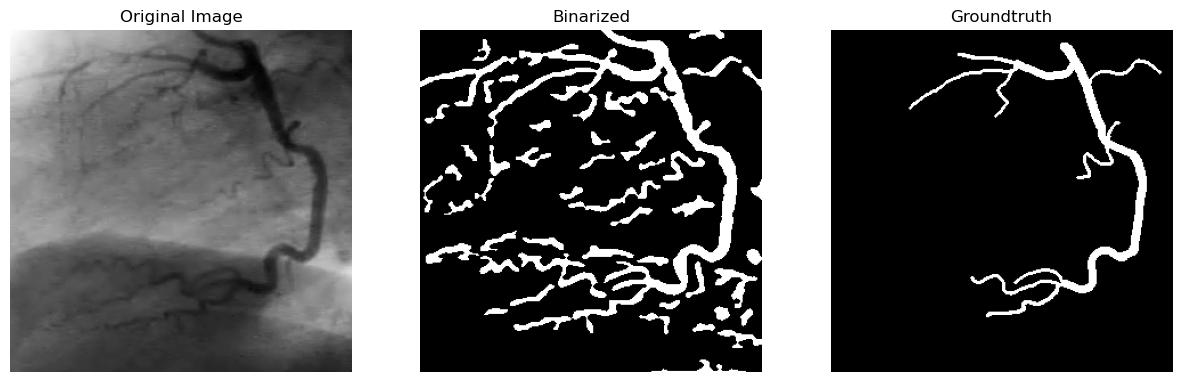

Image 8:
Accuracy: 0.8066
Recall: 0.9155
Precision: 0.1839
F1 Score: 0.3063
Specificity: 0.8012
-------------------------


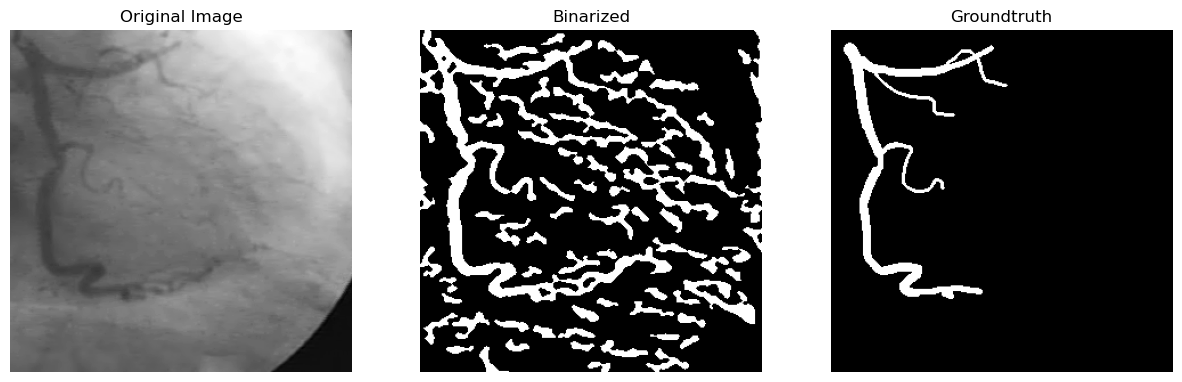

Image 9:
Accuracy: 0.9750
Recall: 0.7436
Precision: 0.7604
F1 Score: 0.7519
Specificity: 0.9874
-------------------------


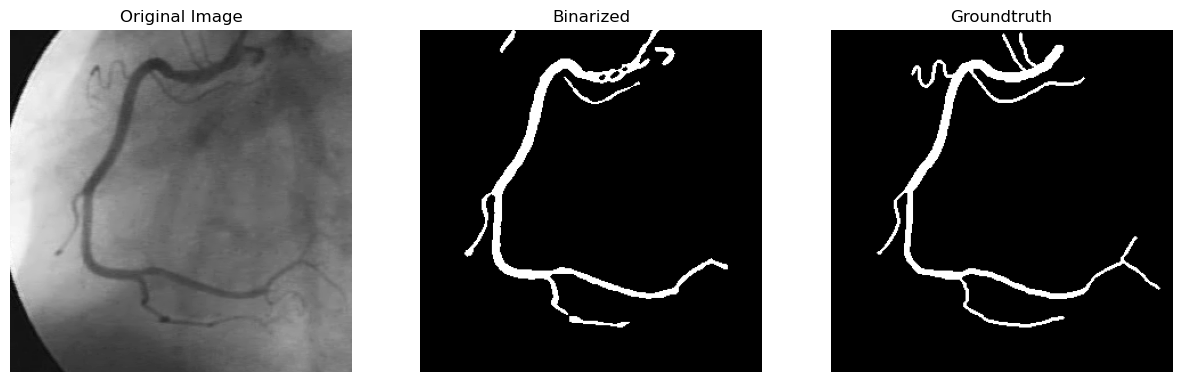

Image 10:
Accuracy: 0.9750
Recall: 0.6948
Precision: 0.7234
F1 Score: 0.7088
Specificity: 0.9878
-------------------------


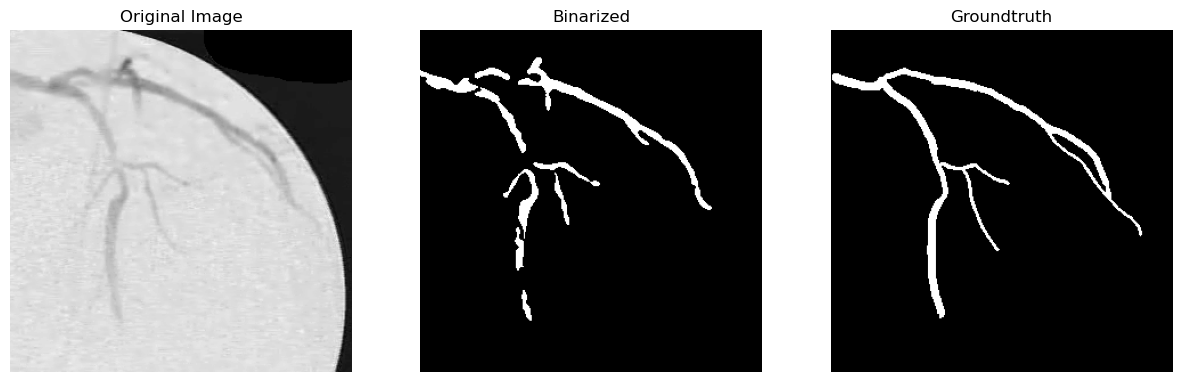

Image 11:
Accuracy: 0.9495
Recall: 0.7217
Precision: 0.4285
F1 Score: 0.5377
Specificity: 0.9592
-------------------------


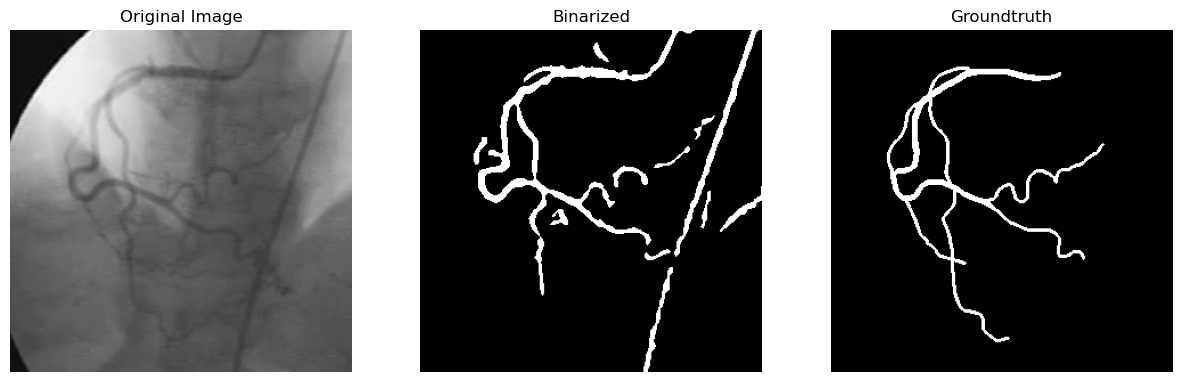

Image 12:
Accuracy: 0.9667
Recall: 0.7881
Precision: 0.7906
F1 Score: 0.7893
Specificity: 0.9820
-------------------------


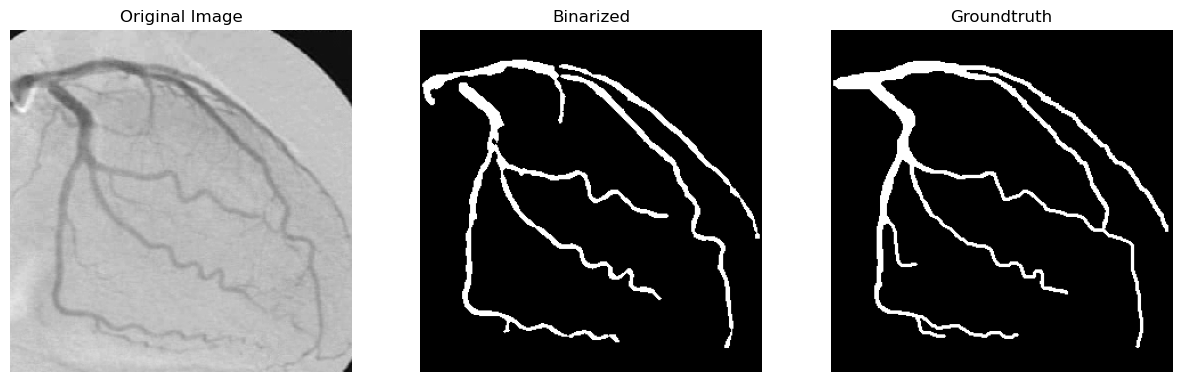

Image 13:
Accuracy: 0.9788
Recall: 0.7709
Precision: 0.7165
F1 Score: 0.7427
Specificity: 0.9874
-------------------------


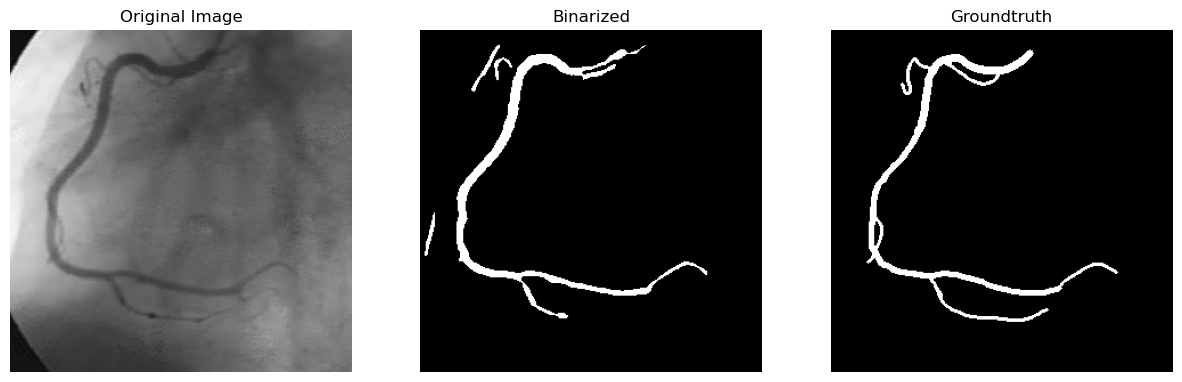

Image 14:
Accuracy: 0.9495
Recall: 0.7690
Precision: 0.6183
F1 Score: 0.6855
Specificity: 0.9634
-------------------------


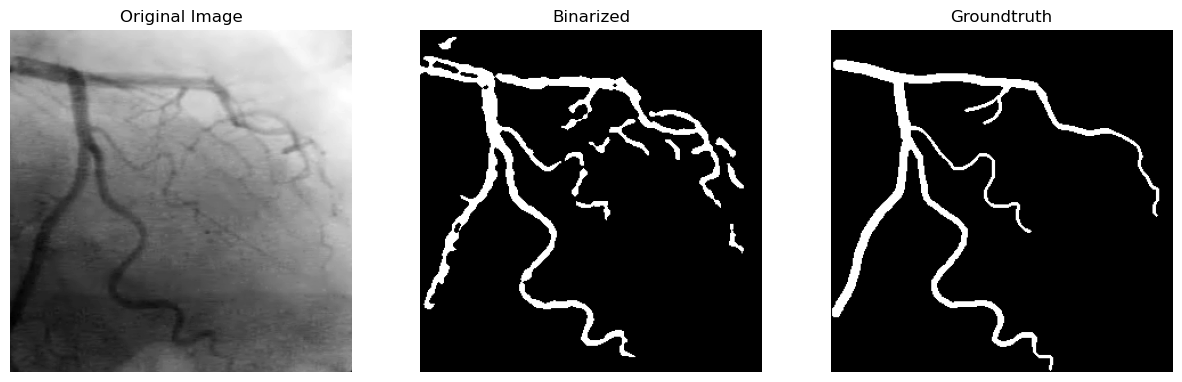

Image 15:
Accuracy: 0.9762
Recall: 0.8408
Precision: 0.7213
F1 Score: 0.7765
Specificity: 0.9832
-------------------------


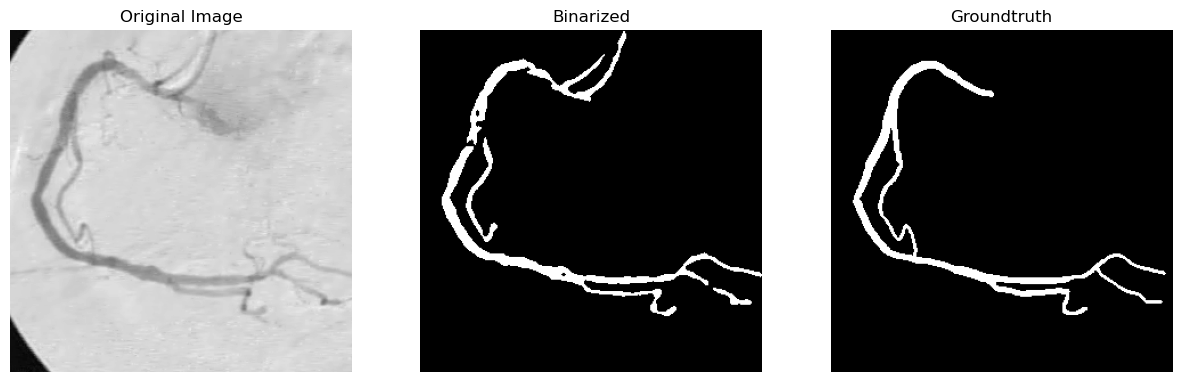

Image 16:
Accuracy: 0.9723
Recall: 0.8440
Precision: 0.7092
F1 Score: 0.7707
Specificity: 0.9798
-------------------------


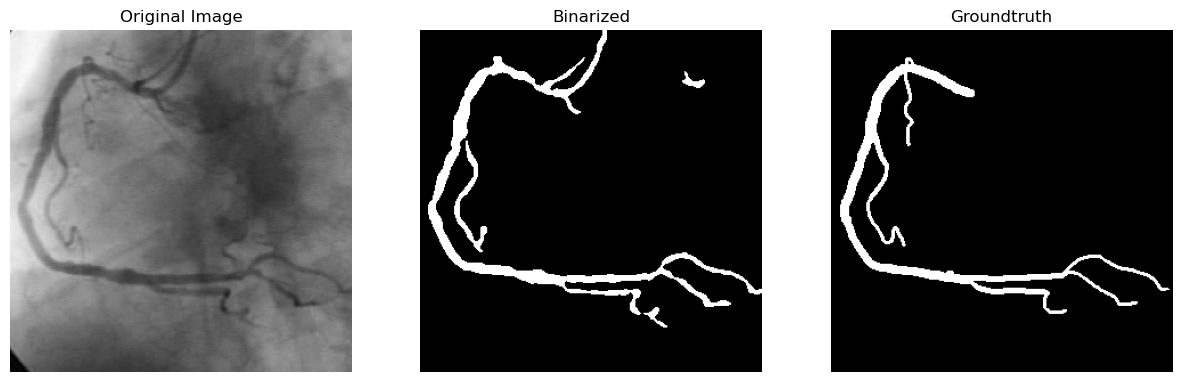

Image 17:
Accuracy: 0.9698
Recall: 0.7724
Precision: 0.6567
F1 Score: 0.7099
Specificity: 0.9797
-------------------------


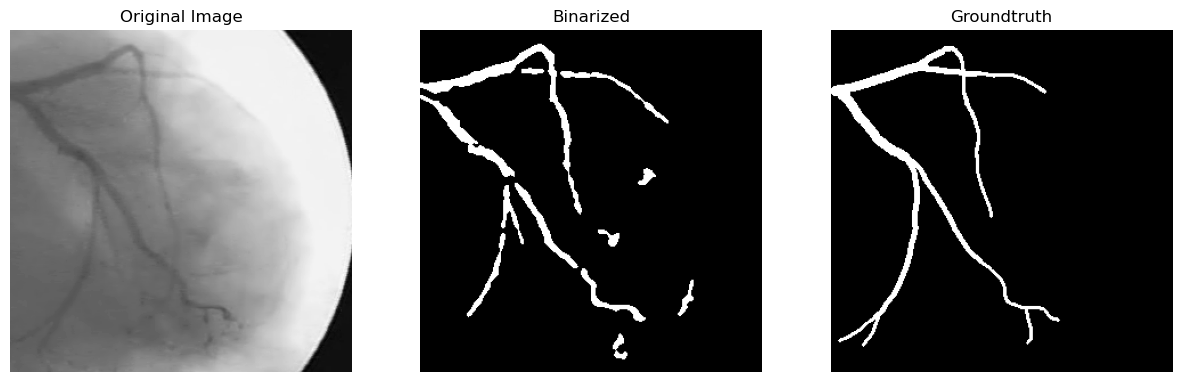

Image 18:
Accuracy: 0.9464
Recall: 0.8302
Precision: 0.4890
F1 Score: 0.6154
Specificity: 0.9528
-------------------------


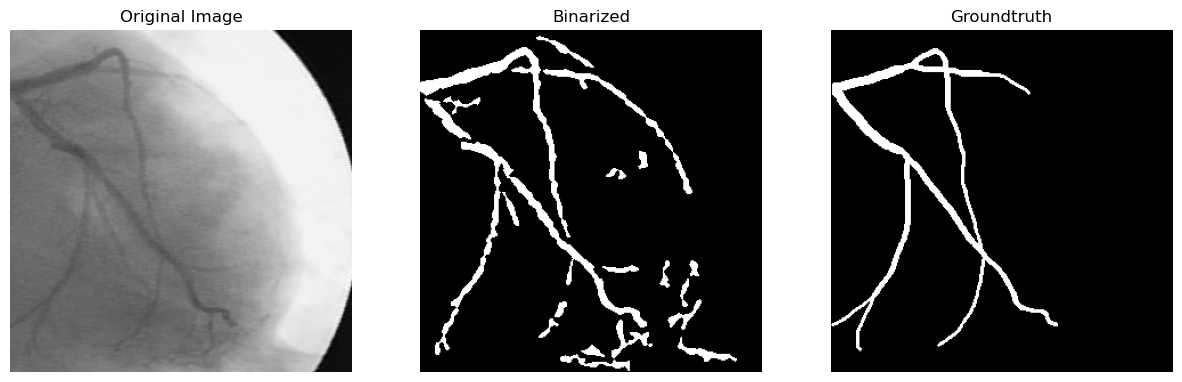

Image 19:
Accuracy: 0.9747
Recall: 0.7581
Precision: 0.7141
F1 Score: 0.7354
Specificity: 0.9852
-------------------------


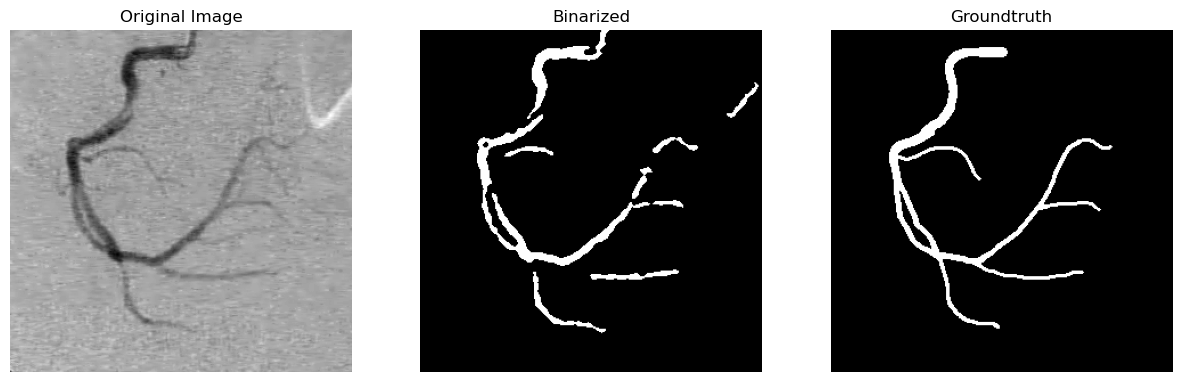

Image 20:
Accuracy: 0.9660
Recall: 0.8099
Precision: 0.7366
F1 Score: 0.7715
Specificity: 0.9779
-------------------------


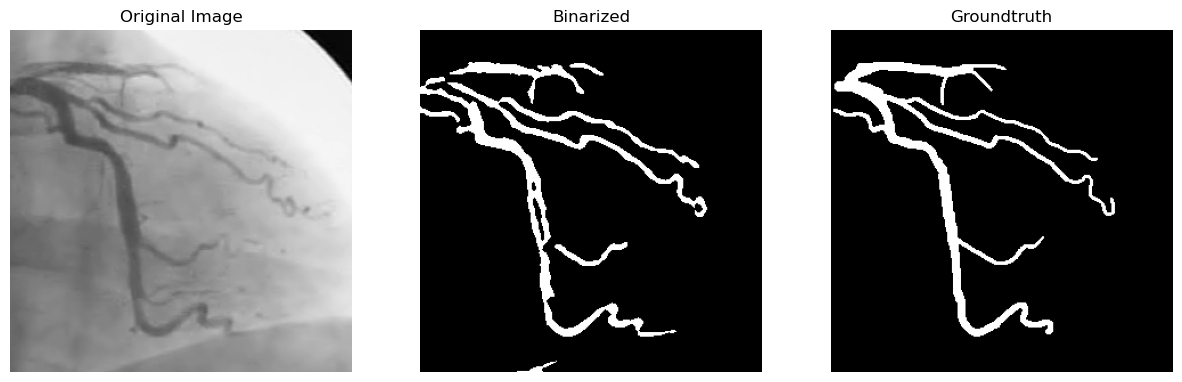

In [40]:
metrics_data = []

for i in range(1, 21):
    image_path = f'data/original/{i}.pgm'
    groundtruth_path = f'data/groundtruth/{i}_gt.pgm'
    
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    groundtruth = plt.imread(groundtruth_path)

    I = image
    I = inpaint_image(I)
    I = binarize_arteries(I)
    I = postprocess_image(I)
    
    # Normalizar las imágenes para que contengan valores binarios (0 y 1)
    I = (I / 255).astype(np.uint8)
    groundtruth = (groundtruth / 255).astype(np.uint8)

    # Calcular métricas
    accuracy = accuracy_score(groundtruth.flatten(), I.flatten())
    recall = recall_score(groundtruth.flatten(), I.flatten())
    precision = precision_score(groundtruth.flatten(), I.flatten())
    f1 = f1_score(groundtruth.flatten(), I.flatten())
    
    tn, fp, fn, tp = confusion_matrix(groundtruth.flatten(), I.flatten()).ravel()
    specificity = tn / (tn + fp)
    
    # Store metrics for this image
    metrics_data.append({
        'Image': i,
        'Accuracy': round(accuracy, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'F1Score': round(f1, 4),
        'Specificity': round(specificity, 4)
    })
    
    print(f'Image {i}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print('-------------------------')
    
    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(I, cmap='gray')
    plt.title('Binarized')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(groundtruth, cmap='gray')
    plt.title('Groundtruth')
    plt.axis('off')
    
    plt.show()

# Create a DataFrame and save to CSV
metrics_df = pd.DataFrame(metrics_data)